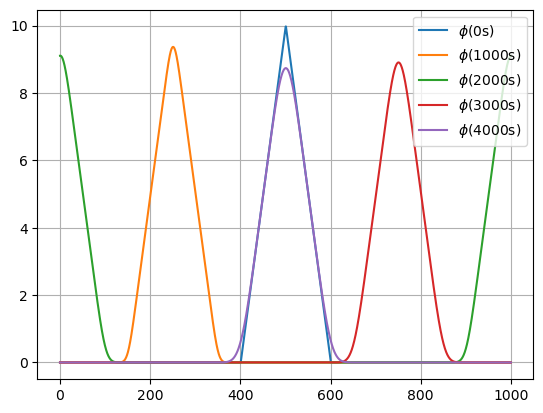

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# func
def func(x):
    if x < 400 or x > 600:
        return 0.
    elif x < 500:
        return 0.1*(x - 400)
    else:
        return 20 - 0.1*(x - 400)

# interpolation
def linearInterp(a, y1, y2):
    return (1-a)*y1 + (a)*y2
def cubicInterp(a, x1, x2, x3, x4):
    return -a*(1-a**2)  *x1/6   \
        + a*(1+a)*(2-a) *x2/2   \
        + (1-a**2)*(2-a)*x3/2   \
        - a*(1-a)*(2-a) *x4/6

# lagrangian
def lagrangian(x0, y0, interpMethod):
    t = 0; sz = len(x0); xmax = max(x0)
    y1 = np.zeros(sz)
    while t < duration:
        for i in range(sz):
            xdepart = x0[i] - u*dt
            # periodic boundary condition
            if xdepart < 0: # velocity > 0
                xdepart = xdepart + xmax
            if xdepart > xmax: # velocity < 0
                xdepart = xdepart - xmax
            m = int(np.floor(xdepart/dx))
            a = (xdepart - x0[m])/dx
            if interpMethod == "linearInterp":
                y1[i] = linearInterp(a, y0[m], y0[m+1]) #linear
            else:
                y1[i] = cubicInterp(a, y0[m-2], y0[m-1], y0[m], y0[m+1])
        y0 = y1.copy()
        if t % tinterval < dt:
            plt.plot(x0, y0, label="$\phi$(" + str(int(np.floor(t))) + "s)")
        t = t + dt
    plt.legend()
    plt.grid()
    plt.show()
    
# initial condition
u = 0.75; dt = 1.0; dx = 0.5 # control vars
# NOTE: no limit of t, however, the it is difficult to implememt
# and high computational cost

# testing zone
# dt = 20

x0 = np.arange(0, 1000+dx, dx);
y0 = np.vectorize(func)(x0)
tinterval = 1000; duration = 4000 + 10 # time

# run
lagrangian(x0, y0, "linearInterp")

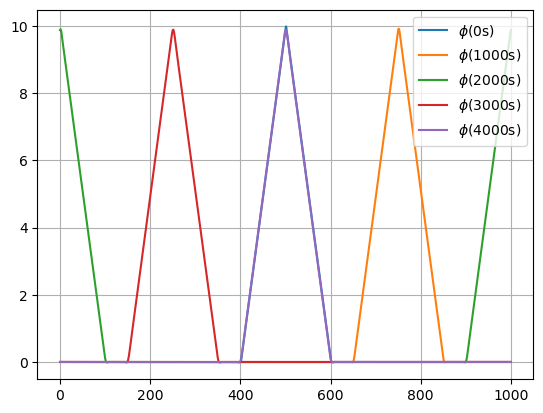

In [2]:
lagrangian(x0, y0, "cubicInterp")